In [318]:
#creating simulated lightcurve

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u


In [319]:
#function magnitude to flux
def mag_to_flux(mag,zeropoint=20.44): #zeropoint is based on TESS instrument handbook,correction factor/filter
    flux=10**(-0.4*(mag-zeropoint))
    print(flux)
    return flux

In [320]:
from astropy.modeling.functional_models import Sine1D
def quasiperiodic_signal(A,B,T,t): #A amplitude of first sine wave, B amplitude of second sine wave, z(p) period of sine waves
    s1=Sine1D(amplitude=A,frequency=1/T)
    s2=Sine1D(amplitude=B,frequency=1/T, phase=np.random.uniform(0.5,1))
    #def nco(s1,s2):
        #phase=0
        #phase_result=[]

        #signal=s1+s2
        #for s in signal:
            # phase_step=2*np.pi*s
            # phase += phase_step
            # phase_result.append(phase)

        # return np.sin(phase_result)

    


    
    signal=s1(t)#+s2(t)
    # signal=nco(s1(t),s2(t))
    plt.plot(t,s1(t), color='purple')
    #plt.plot(t,s2(t), color='red')
    plt.plot(t,signal)
    plt.axhline(y=A , color="purple")
    plt.axhline(y=B , color="green")
    plt.show()
    return signal


#function to simulate random light curve
def lightcurve(duration,cadence,start,mag,A,B,T, zeropoint=20.44): 
    cadence=cadence.value
    points_per_day=1/cadence #unit of days per cadence 
    step_size=int(duration*points_per_day)
    print(step_size)
    scatter_fraction=mag_to_flux(mag,zeropoint) 
    #print(scatter_fraction,"scatter fraction")
    time=start+np.linspace(start,duration,step_size) 
    flux=1+scatter_fraction*np.random.randn(time.size)#*np.ones_like(time)#.size) #same number of data points of 1 times scatter fraction
    #flux=flux/1e6
    print(flux)
    flux/=np.median(flux)
    #print(flux)


    periodic_signal=quasiperiodic_signal(A,B,T,time)#+np.median(flux)
    injected_signal=(flux+periodic_signal)/np.median(flux)

    #plt.plot(time,periodic_signal,color="blue")
    plt.plot(time,(flux+periodic_signal), color="green")
    plt.show()
    return time,injected_signal ,periodic_signal

14400
14996.84835502377
[10840.74076849  -827.84326472  2514.28330707 ...  1378.43294265
  4549.27141734 -7977.78462004]


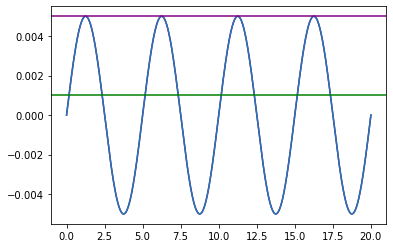

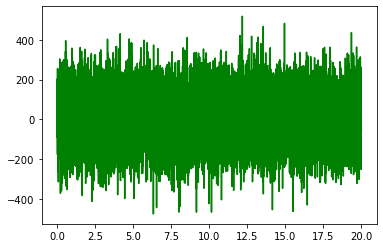

In [321]:
duration=20 #how long the light curve is
#cadence=(2/60)/24 #unit of days 
cadence=(2*u.min).to(u.day)
start=0
mag=10
A=5/1000 #amplitude
B=1/1000  #amplitude
T=5 #5 days period

t,f,signal =lightcurve(duration,cadence,start,mag,A,B,T)



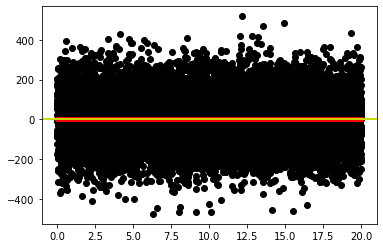

In [322]:
plt.plot(t,f,'ko')
plt.plot(t,np.median(f)+signal,'r.')
#plt.xlim(0,5)
plt.axhline(y=A+ np.median(f), color="purple")
plt.axhline(y=B+ np.median(f), color="green")
plt.axhline(y=A+B+ np.median(f), color="yellow")

In [323]:
print(mag_to_flux(0,5))

100.0
100.0


In [324]:
#Lomb-Scargle
def LS(t,f,minT,maxT):
    from astropy.timeseries import LombScargle
    min_freq=1/maxT
    max_freq=1/minT

    model=LombScargle(t,f)
    freq,power=model.autopower(method='fast', normalization='psd',minimum_frequency=min_freq, maximum_frequency=max_freq) #power-spectral distribution
    period=1/freq
    return period,power

    

In [325]:
period,power=LS(t,f,1,10)

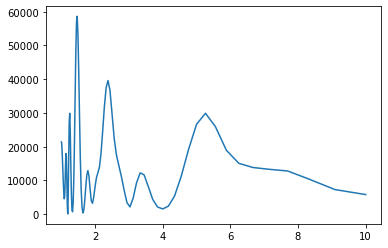

In [326]:
plt.plot(period,power)

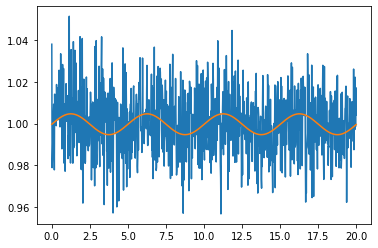

In [330]:
from Injection_rotation_in_lightcurves import lightcurve


#example usage

duration=20 
start=0
mag=10
zeropoint=20.44
cadence=0.5/24
A = 5/1e3 #amplitude of injected sine wave
time,injected_signal,periodic_signal = lightcurve(start,duration,cadence,mag,A,T,zeropoint)

plt.plot(time, injected_signal)
plt.plot(time,periodic_signal)
plt.show()


In [333]:
#Lomb-Scargle
def LS(t,f,minT,maxT):
    from astropy.timeseries import LombScargle
    min_freq=1/maxT
    max_freq=1/minT

    model=LombScargle(t,f)
    freq,power=model.autopower(method='fast', normalization='standard',minimum_frequency=min_freq, maximum_frequency=max_freq) #power-spectral distribution
    period=1/freq
    return period,power

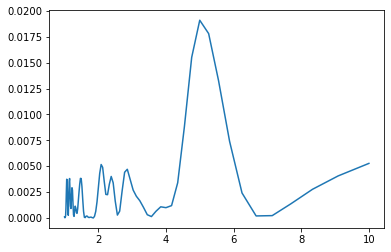

In [334]:
period,power=LS(time,injected_signal,1,10)
plt.plot(period,power)
plt.show()
